In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import requests

# Linear Algebra and Stats in Python (Using Pandas) - Answers
## Outline of this notebook

**Using pandas...**

* **getting some data**
* **mean, median, mode**
* **variance and standard deviation**
* **covariance and correlation**
* **histograms**
* **scatter plots**

## Importing Data

The sklearn.datasets package embeds some small toy datasets, which makes them very easy to obtain. Read more about them [here](http://scikit-learn.org/stable/datasets/index.html).

In [140]:
from sklearn.datasets import load_iris

# save load_iris() sklearn dataset to iris_raw_data
# if you'd like to check dataset type use: type(load_iris())
# if you'd like to view list of attributes use: dir(load_iris())
iris_data_raw = load_iris()

# np.c_ is the numpy concatenate function
# which is used to concat iris['data'] and iris['target'] arrays 
# for pandas column argument: concat iris['feature_names'] list
# and string list (in this case one string); you can make this anything you'd like..  
# the original dataset would probably call this ['Species']
iris_df = pd.DataFrame(data= np.c_[iris_data_raw['data'], iris_data_raw['target']],
                     columns= iris_data_raw['feature_names'] + ['species'])

In [141]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


### Cleaning things up

I've decided I'd like to change the species column from a number (which represents a certain species of Iris), to the actual species. I can do this using the map functionality.

This is a personal choice and isn't necessary.

You can read more about map [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html).

In [142]:
iris_type = {
    0.0: 'Iris Setosa',
    1.0: 'Iris Versicolour',
    2.0: 'Iris Virginica'
}
    
iris_df['species'] = iris_df['species'].map(iris_type)

In [143]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,Iris Setosa
1,4.9,3.0,1.4,0.2,Iris Setosa
2,4.7,3.2,1.3,0.2,Iris Setosa
3,4.6,3.1,1.5,0.2,Iris Setosa
4,5.0,3.6,1.4,0.2,Iris Setosa


### Cleaning things up

I've decided to change the column names to make them easier to call later. Read through to get a sense of what's happening.

In [144]:
iris_df = iris_df.rename(columns={
    'sepal length (cm)': 'sep_length',
    'sepal width (cm)': 'sep_width',
    'petal length (cm)': 'pet_length',
    'petal width (cm)': 'pet_width',
    'target': 'iris_type'
})

In [145]:
iris_df.head()

,sep_length,sep_width,pet_length,pet_width,species
0,5.1,3.5,1.4,0.2,Iris Setosa
1,4.9,3.0,1.4,0.2,Iris Setosa
2,4.7,3.2,1.3,0.2,Iris Setosa
3,4.6,3.1,1.5,0.2,Iris Setosa
4,5.0,3.6,1.4,0.2,Iris Setosa


### Let's explore the data a bit...

In [147]:
iris_df.dtypes

sep_length    float64
sep_width     float64
pet_length    float64
pet_width     float64
species        object
dtype: object

In [148]:
iris_df.describe()

,sep_length,sep_width,pet_length,pet_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [149]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sep_length    150 non-null float64
sep_width     150 non-null float64
pet_length    150 non-null float64
pet_width     150 non-null float64
species       150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


## Mean, Median, Mode

The **mean** is the arithmetic average of a group of values, found by dividing the total of all values by the number of values.

The **median** is the middle value in a group of values, found by ordering the values from smallest to largest and locating the one that occurs in the middle. If the size of the group is even, it is found by averaging the middle two values.

The **mode** is the value that occurs most often in a group of values, and is found by counting the frequency of every distinct value in the group and outputting the one that occurs most frequently.

In pandas, these are found by running:

- `DataFrame.mean()`
- `DataFrame.median()`
- `DataFrame.mode()`

**Your turn! Find the mean, median, and mode of each column in the pandas dataframe `iris_df`.**

In [116]:
iris_df.mean()

sep_length    5.843333
sep_width     3.054000
pet_length    3.758667
pet_width     1.198667
dtype: float64

In [119]:
iris_df.median()

sep_length    5.80
sep_width     3.00
pet_length    4.35
pet_width     1.30
dtype: float64

In [117]:
iris_df.mode()

,sep_length,sep_width,pet_length,pet_width,species
0,5.0,3.0,1.5,0.2,Iris Setosa
1,NaN,NaN,NaN,NaN,Iris Versicolour
2,NaN,NaN,NaN,NaN,Iris Virginica


You might be wondering why species ended up with three answers while the others only have one. Remember, there are 50 rows each for each species of Iris. Therefore, each Iris species is listed the same amount of times.

## Variance and Standard Deviation

It is useful to get a sense of how the values in a dataset are spread about the average or the central value in that dataset. **Variance** and **standard deviation** are values that quantify that spread.

The **variance** of a set of values, **$\sigma^2$**, is the average of the square of the difference of the values in the dataset from the dataset's mean:

\begin{align}
\sigma^2 = \frac{\sum_{i=1}^{n}(x_i - \mu)^2} {n}\
\end{align}

We square the differences to preserve the magnitude of the difference only (otherwise we would be adding and subtracting values, and lose the average magnitude). So, the variance is not on the same scale as the values themselves.

In pandas, variance is found by running:

`DataFrame.var()`

**Find the variance of each column in the iris_df dataframe.**

In [120]:
iris_df.var()

sep_length    0.685694
sep_width     0.188004
pet_length    3.113179
pet_width     0.582414
dtype: float64

### Variance step by step

At this point, I'd like to break down variance into a for-loop so that one can see/disect each individual step that is happening. It will also give you some exposure to for-loops! 

**Walk through this loop and try to get an understanding for what's happening.**

In [122]:
col_list = ['sep_length', 'sep_width', 'pet_length', 'pet_width']

iris_variance_dictionary = {}


for col in col_list:
# This line is saying "for each element in the column list"
# In other words, take the first element and run through all these steps, then take the second and do the same, third, and so on
    mean = iris_df[col].mean()
    # Find the mean of that column. 
    # So for the first time through, col = 'sep_length' and you're finding the mean of the 'sep_length' column
    value_minus_mean_squared_list = []
    # Creates an empty list, which you will later fil with value_minus_mean_squared values
    for i, row in iris_df.iterrows():
    # Here, I'm looping through each row of the dataframe, one at a time.
    # So, each time through this imbedded for-loop, you are at the next row in the dataframe.
        value_minus_mean_squared = (row[col] - mean)**2
        # take the value of that row at the specified column (sep_length for the first time through the main for-loop), subtract the mean, and square the result
        value_minus_mean_squared_list.append(value_minus_mean_squared)
        #append the value you found to the list you're keeping. 
        #After this embedded for-loop has gone through the entire dataframe, you will have as many value_minus_mean_squared values in the array as there are rows
    value_minus_mean_squared_sum = sum(value_minus_mean_squared_list)
    #determine the sum of all the value_minus_mean_squared values
    list_length = len(iris_df[col])
    #determine the amount of values
    variance = value_minus_mean_squared_sum / list_length
    #calculate the variance for that column you're on (for the first run through, 'sep_length' column)
    
    iris_variance_dictionary[col] = variance
    #Add the new value to the dictionary

In [123]:
iris_variance_dictionary

{'pet_length': 3.092424888888889,
 'pet_width': 0.57853155555555558,
 'sep_length': 0.68112222222222207,
 'sep_width': 0.18675066666666679}

### Standard Deviation

The **standard deviation**, $\sigma$, is the square root of the variance:

\begin{align}
\sigma = \sqrt\frac{\sum_{i=1}^{n}(x_i - \mu)^2} {n}\
\end{align}

We use the **standard deviation** much more regularly than the **variance** because it is on the same scale as the original data.

In pandas, variance is found by running:

`DataFrame.std()`

**Find the std for each column in the iris_df dataframe**

In [150]:
iris_df.std()

sep_length    0.828066
sep_width     0.433594
pet_length    1.764420
pet_width     0.763161
dtype: float64

### Standard Deviation Step by Step

I will add a couple lines to make the above for-loop so that it will also calculate standard deviation and add it to a dictionary!

In [154]:
col_list = ['sep_length', 'sep_width', 'pet_length', 'pet_width']

iris_variance_dictionary = {}

iris_standard_deviation_dictionary = {}
#Create standard deviation dictionary

for col in col_list:
    mean = iris_df[col].mean()
    value_minus_mean_squared_list = []
    for i, row in iris_df.iterrows():
        value_minus_mean_squared = (row[col] - mean)**2
        value_minus_mean_squared_list.append(value_minus_mean_squared)
    value_minus_mean_squared_sum = sum(value_minus_mean_squared_list)
    list_length = len(iris_df[col])
    variance = value_minus_mean_squared_sum / list_length
    standard_dev = np.sqrt(variance)
    # calculate standard deviation
    
    iris_variance_dictionary[col] = variance
    
    iris_standard_deviation_dictionary[col] = standard_dev
    #Add the new value to the dictionary

In [156]:
iris_standard_deviation_dictionary

{'pet_length': 1.7585291834055212,
 'pet_width': 0.76061261858817175,
 'sep_length': 0.82530129178514078,
 'sep_width': 0.43214658007054363}

## Covariance

So far, we've been looking at statistical properties of individual collections of data (in our case, columns of the `iris_df` ) by themselves. However, it is also useful to quantify how two collections of data vary with each other. **Covariance** and **correlation** measure this exact quantity.

**Covariance**, like the variance, is a measure of spread, however it also measures how closely two datasets track each other. That is, **covariance** describes both how far the variables are spread out, and the nature of their relationship, whether they tend to increase and decrease together, or whether they do not track each other at all. Like **variance**,  the **covariance** is a squared quantity (again, to simply measure the magnitude of the spread and to avoid subtracting numbers from each other) so it is not on the same scale as the mean (and the **covariance** of different pairs of variables can have completely different scales):

\begin{align}
Cov(x,y) = \frac{\sum_{i=1}^{n}(x_i - \mu_x)(y_i - \mu_y)} {n}\
\end{align}

When we look at the covariance of a dataset, we compute what is called a **covariance matrix**.

This matrix is symmetric and tells us what all the paired covariance values are for every pair of rows (or columns) in our original matrix.

To find covariance in pandas, run:

`DataFrame.cov()`

**Find the covariance for each column against each column in the iris_df dataframe.**

In [124]:
iris_covariance = iris_df.cov()
iris_covariance

,sep_length,sep_width,pet_length,pet_width
sep_length,0.685694,-0.039268,1.273682,0.516904
sep_width,-0.039268,0.188004,-0.321713,-0.117981
pet_length,1.273682,-0.321713,3.113179,1.296387
pet_width,0.516904,-0.117981,1.296387,0.582414


## Correlation

**Correlation** is sort of like **standard deviation** generalized to pairs of datasets.

Really, the **correlation** is a **covariance** scaled by each dataset's **standard deviation**, so that it can only take on values from -1 to +1. This allows us to compare two pairs of variables and quickly tell if one pair of datasets is more related than an other (since both values are scaled to the same range!):

\begin{align}
r(x,y) = \frac{cov(x,y)} {\sigma_x\sigma_y}\
\end{align}

Or this:

\begin{align}
r(x,y) = \frac{\frac{\sum_{i=1}^{n}(x_i-\mu_x)(y_i-\mu_y)} {n}} {\sigma_x\sigma_y}\
\end{align}

A positive correlation indicates the sets of values change together (when one increases or decreases the other does the same). A negative correlation indicates that the variables change in opposite directions (when one increases the other decreases).

Just like the **covariance**, when we compute **correlations** for some dataset, we really compute a **correlation matrix** over all of the distinct sets of values in the dataset. The **correlation matrix** is symmetric, just like the **covariance matrix**.

To find correlation in pandas, run:

`DataFrame.corr()`

**Find the correlation for each column against each column in the iris_df dataframe.**

In [125]:
iris_correlation = iris_df.corr()
iris_correlation

,sep_length,sep_width,pet_length,pet_width
sep_length,1.000000,-0.109369,0.871754,0.817954
sep_width,-0.109369,1.000000,-0.420516,-0.356544
pet_length,0.871754,-0.420516,1.000000,0.962757
pet_width,0.817954,-0.356544,0.962757,1.000000


## Exercise Time!
* Compute the row-based correlation matrix for `iris_df`.
* Visualize the correlation matrix as a heatmap. Notice anything?
* I've loaded in vertebral_data into a `Pandas` dataframe called `vertebral_df` for you below:
    * Compute the mean of each column. 
    * Compute the median of each column.
    * Compute the mode of each column.
    * What would it mean if the mean and the median for a given column are very far apart?
    * What is useful about knowing the mode?
    * Compute the variance and standard deviation of each column.
    * Generate the columnar covariance and correlation matrices for this matrix.
    * Do any columns appear to change together (based on their covariances/correlations)?
    * What conclusions can we draw from these column-based statistics?
    * If we had computed all of the row-based statistics here, what would their interpretation be?

#### Compute the row-based correlation matrix for `iris_df`.

In [167]:
iris_correlation = iris_df.corr()
iris_correlation

,sep_length,sep_width,pet_length,pet_width
sep_length,1.000000,-0.109369,0.871754,0.817954
sep_width,-0.109369,1.000000,-0.420516,-0.356544
pet_length,0.871754,-0.420516,1.000000,0.962757
pet_width,0.817954,-0.356544,0.962757,1.000000


#### Visualize the correlation matrix as a heatmap. Notice anything?

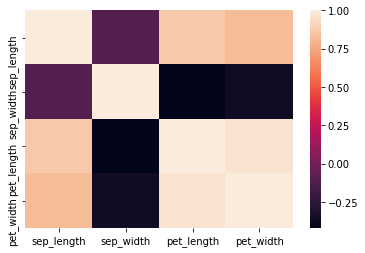

In [127]:
ns.heatmap(iris_correlation)

#### I've loaded in vertebral_data into a `Pandas` dataframe called `vertebral_df` for you below:

In [83]:
headers = ['pelvic incidence', 'pelvic tilt', 'lumbar lordosis angle', 'sacral slope', 'pelvic radius', 'grade of spondylolisthesis', 'classification']
vertebral_df = pd.read_csv('../data/vertebral_column_2_categories.dat', delimiter=' ', names=headers, index_col=False)
vertebral_df.head()

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis,classification
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB


#### Compute the mean of each column. 


In [157]:
ertebral_df.mean()

pelvic incidence               60.496484
pelvic tilt                    17.542903
lumbar lordosis angle          51.930710
sacral slope                   42.953871
pelvic radius                 117.920548
grade of spondylolisthesis     26.296742
dtype: float64

#### Compute the median of each column.


In [158]:
vertebral_df.median()

pelvic incidence               58.690
pelvic tilt                    16.360
lumbar lordosis angle          49.565
sacral slope                   42.405
pelvic radius                 118.265
grade of spondylolisthesis     11.765
dtype: float64

#### Compute the mode of each column.


In [159]:
vertebral_df.mode()

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis,classification
0,42.52,5.27,35.0,56.31,110.71,-4.08,AB
1,49.71,8.40,42.0,NaN,116.56,-2.01,NaN
2,50.91,10.06,47.0,NaN,116.59,1.01,NaN
3,53.94,10.22,52.0,NaN,116.80,3.09,NaN
4,54.92,10.76,58.0,NaN,117.98,4.96,NaN
5,63.03,13.11,NaN,NaN,119.32,NaN,NaN
6,65.01,13.28,NaN,NaN,129.39,NaN,NaN
7,65.76,13.92,NaN,NaN,NaN,NaN,NaN
8,74.72,14.38,NaN,NaN,NaN,NaN,NaN
9,NaN,15.40,NaN,NaN,NaN,NaN,NaN


#### What would it mean if the mean and the median for a given column are very far apart?

If they're close, then the group is probably normally distributed (the familiar bell curve), and the average is useful. If they're far apart, then the values are not normally distributed (the data is skewed) and the median is the better representation.

#### What is useful about knowing the mode?

The mode of a set of data values is the value that appears most often. In other words, it is the value that is most likely to be sampled. 

#### Compute the variance of each column

In [160]:
vertebral_df.var()

pelvic incidence               297.083454
pelvic tilt                    100.162867
lumbar lordosis angle          344.242226
sacral slope                   180.170168
pelvic radius                  177.359254
grade of spondylolisthesis    1410.669696
dtype: float64

#### Copute the standard deviation of each column

In [161]:
vertebral_df.std()

pelvic incidence              17.236109
pelvic tilt                   10.008140
lumbar lordosis angle         18.553766
sacral slope                  13.422748
pelvic radius                 13.317629
grade of spondylolisthesis    37.558883
dtype: float64

#### Generate the covariance matrices for this matrix.

In [162]:
vertebral_df.cov()

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis
pelvic incidence,297.083454,108.535432,229.384177,188.545538,-56.808501,413.495640
pelvic tilt,108.535432,100.162867,80.358704,8.372740,4.353114,149.545840
lumbar lordosis angle,229.384177,80.358704,344.242226,149.024262,-19.858226,371.889090
sacral slope,188.545538,8.372740,149.024262,180.170168,-61.161830,263.955081
pelvic radius,-56.808501,4.353114,-19.858226,-61.161830,177.359254,-13.041747
grade of spondylolisthesis,413.495640,149.545840,371.889090,263.955081,-13.041747,1410.669696


#### Generate the correlation matrices for this matrix.

In [163]:
vertebral_df.corr()

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis
pelvic incidence,1.000000,0.629186,0.717286,0.814959,-0.247484,0.638733
pelvic tilt,0.629186,1.000000,0.432760,0.062327,0.032660,0.397840
lumbar lordosis angle,0.717286,0.432760,1.000000,0.598389,-0.080368,0.533665
sacral slope,0.814959,0.062327,0.598389,1.000000,-0.342147,0.523571
pelvic radius,-0.247484,0.032660,-0.080368,-0.342147,1.000000,-0.026073
grade of spondylolisthesis,0.638733,0.397840,0.533665,0.523571,-0.026073,1.000000


I'll leave the last few questions for you to think about yourself. If you have questions, feel free to bring it up in office hours!

**Do any columns appear to change together (based on their covariances/correlations)?**

**What conclusions can we draw from these column-based statistics?**

**If we had computed all of the row-based statistics here, what would their interpretation be?**

## Histograms

A regular histogram is a very powerful, simple way to get a sense of the kinds of values a single set of data is comprised of. 

Let's take a look at the histogram of values for the first column in `iris_df`.

There are a few ways you can do this. A couple are:

- `sns.distplot(DataFrame[column_name])` (uses seaborn)
- `DataFrame[column_name]).hist()` (uses matplotlib functionality with pandas)

#### Create a histogram of the sep_length column in the iris_df dataframe

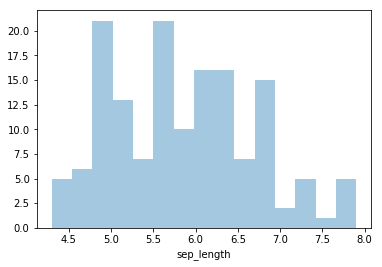

In [84]:
sns.distplot(iris_df['sep_length'], kde=False, bins=15)

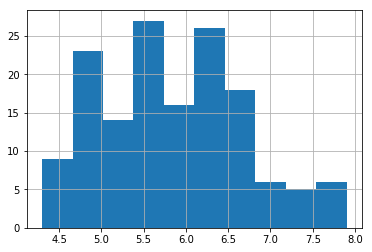

In [85]:
iris_df['sep_length'].hist()

The **x-axis shows us the actual range of values that the column takes on**. It looks like the first column ranges from just over 4 to just under 8.

The **y-axis is a frequency count of the number of rows in the column that fall into each vertical bin**. So, the first bin (furthest to the left), which ranges from ~4.25 to ~4.75 contains 11 values.

We can also make **cumulative history histograms**, which give us a graphical way to see what fraction of the datapoints are below or above a certain value.

You run the following in seaborn to create this:

`sns.distplot(DataFrame[column_name], hist_kws={"cumulative":True},kde_kws={"cumulative":True})`

#### Create a cumulative histogram of the sep_length column in the iris_df dataframe

Cumulative frequency plot of 1st column:


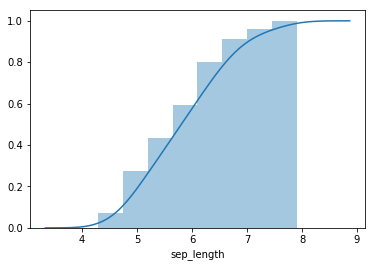

In [86]:
sns.distplot(iris_df['sep_length'], hist_kws={"cumulative":True},kde_kws={"cumulative":True})
print("Cumulative frequency plot of 1st column:")

## Scatter Plot

When you want to visualize how two columns vary together, you can use a **scatter plot**. 

A scatter plot simply plots the value for each column per-row for the two columns you've chosen.

Every dot in the scatter plot is an individual row. 

You can combine both a **scatter plot** and a **histogram** for a pair of columns very effectively using a `jointplot`.

`sns.jointplot(x_column, ycolumn)

Scatter plot with histograms for the first two columns in the iris dataset:


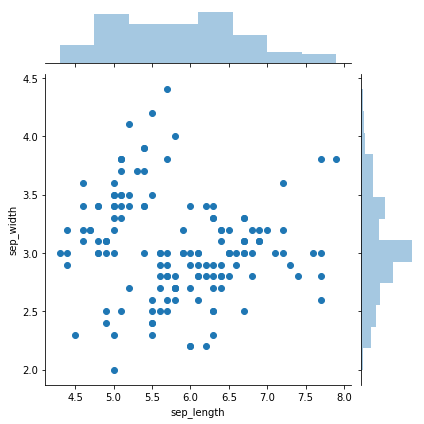

In [166]:
sns.jointplot(iris_df['sep_length'], iris_df['sep_width'],stat_func=None)
print("Scatter plot with histograms for the first two columns in the iris dataset:")

### Exercise Time!
* Using the `vertebral_df` dataset:
    * Compute the column-wise correlation matrix
    * Visualize the scatter plot for two columns that are positively correlated
    * Visualize the scatter plot for two columns that are negatively correlated (anti-correlated)
    
If you don't recall how to make a scatter plot in seaborn or matplotlib, try google! It's good to get used to having to search for answers. :)

#### Compute the column-wise correlation matrix

In [88]:
vertebral_df.corr()

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis
pelvic incidence,1.000000,0.629186,0.717286,0.814959,-0.247484,0.638733
pelvic tilt,0.629186,1.000000,0.432760,0.062327,0.032660,0.397840
lumbar lordosis angle,0.717286,0.432760,1.000000,0.598389,-0.080368,0.533665
sacral slope,0.814959,0.062327,0.598389,1.000000,-0.342147,0.523571
pelvic radius,-0.247484,0.032660,-0.080368,-0.342147,1.000000,-0.026073
grade of spondylolisthesis,0.638733,0.397840,0.533665,0.523571,-0.026073,1.000000


#### Visualize the scatter plot for two columns that are positively correlated

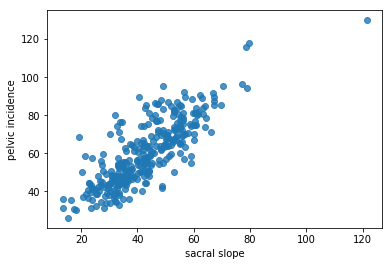

In [101]:
sns.regplot(vertebral_df['sacral slope'], vertebral_df['pelvic incidence'], fit_reg=False)

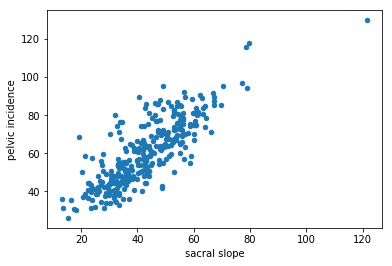

In [102]:
vertebral_df.plot.scatter('sacral slope', 'pelvic incidence')

#### Visualize the scatter plot for two columns that are negatively correlated

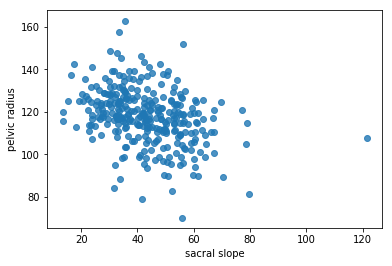

In [103]:
sns.regplot(vertebral_df['sacral slope'], vertebral_df['pelvic radius'], fit_reg=False)

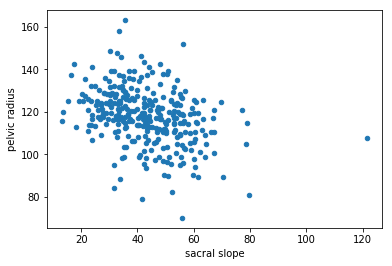

In [104]:
vertebral_df.plot.scatter('sacral slope', 'pelvic radius')